<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median()).astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Исследование задачи

<AxesSubplot:title={'center':'Соотношение тех, кто остался и тех кто ушел'}>

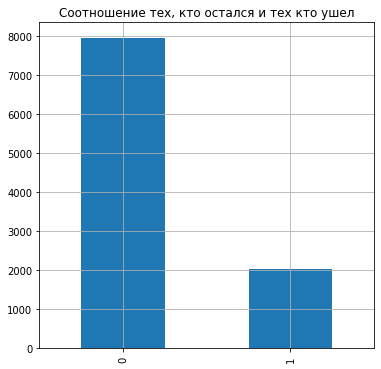

In [ ]:
data['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(6,6),title='Соотношение тех, кто остался и тех кто ушел')

Соотношение 1:4. Значит присутствует дисбаланс данных

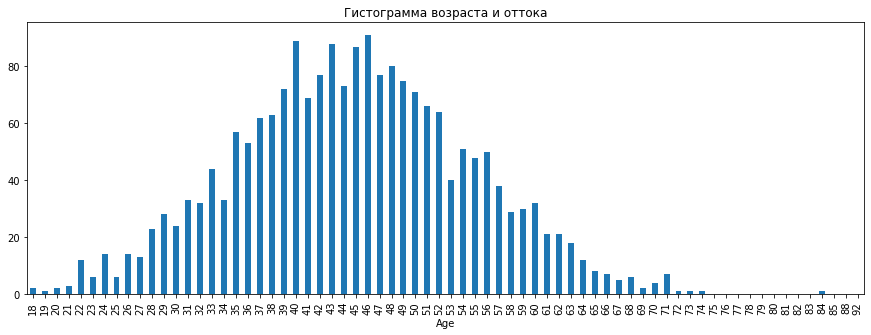

In [ ]:
data.groupby('Age')['Exited'].sum().plot(figsize=(15,5),kind='bar',title='Гистограмма возраста и оттока')
plt.show()

По графику видно, что люди от 39 до 52 уходят чаще остальных

In [ ]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [ ]:
features = data_ohe.drop(['Exited'], axis=1)
target = data_ohe['Exited']

In [ ]:
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

In [ ]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_31/1580900459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/1580900459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Избавились от категориальных признаков методом One hot encoder

In [ ]:
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=1515)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)

    model_RFC = RandomForestClassifier(max_depth=7, n_estimators=43, min_samples_leaf=3, random_state=1515)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)

    model_LgR = LogisticRegression(solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Точность:")
    print("Дерево решений", DTC_score, "| Случайный лес ", RFC_score, "| Логистческая регрессия", LgR_score)

In [ ]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [ ]:
best = best_depth = best_est = 0
for depth in range(1, 16):
    for est in range(1,50):
        model_RFC = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model_RFC.fit(features_train, target_train)
        predictions = model_RFC.predict(features_valid)
        #print('Глубина:', depth, 'est:', est, 'F1:', f1_score(target_valid, predictions))
        if best < f1_score(target_valid, predictions):
            best = f1_score(target_valid, predictions)
            best_depth = depth
            best_est = est
print(best, best_depth, best_est)

0.5999999999999999 14 9


Лучший показатель F1 = 0.598 при max_depth=13 и n_estimators=9

In [ ]:
RFC_probabilities_one_valid = model_RFC.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_probabilities_one_valid)
auc_roc_RFC

0.8402278322515865

## Борьба с дисбалансом

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled


In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled


<b>Проверим upsample</b>

In [ ]:
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

0    0.501043
1    0.498957
Name: Exited, dtype: float64
(9588,)


In [ ]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [ ]:
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Точность:
Дерево решений 0.793 | Случайный лес  0.8105 | Логистческая регрессия 0.702


<b>Проверим downsample</b>

In [ ]:
features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 1)
print(target_train_downsampled.value_counts(normalize = 1))
print(target_train_downsampled.shape)

0    0.800667
1    0.199333
Name: Exited, dtype: float64
(6000,)


In [ ]:
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8585 | Логистческая регрессия 0.802


In [ ]:
all_models_accuracy(features_train_downsampled, target_train_downsampled, features_valid, target_valid)

Точность:
Дерево решений 0.79 | Случайный лес  0.8605 | Логистческая регрессия 0.802


###### downsample показывает себя хуже, чем upsample. Поэтому буду использовать upsample

In [ ]:
best = best_depth = best_est = 0
for depth in range(1, 16):
    for est in range(1,50):
        model_RFC_upsampled = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
        predictions = model_RFC_upsampled.predict(features_valid)
        #print('Глубина:', depth, 'est:', est, 'F1:', f1_score(target_valid, predictions))
        if best < f1_score(target_valid, predictions):
            best = f1_score(target_valid, predictions)
            best_depth = depth
            best_est = est
#print(best, best_depth, best_est)
print('Лучший показатель F1={}, при max_depth={} и n_estimatos={}'.format(best, best_depth, best_est))

0.6329723225030085 13 35
Лучший показатель F1=0.6329723225030085, при max_depth=13 и n_estimatos=35


In [ ]:
RFC_upsampled_valid = model_RFC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_RFC = roc_auc_score(target_valid, RFC_upsampled_valid)
auc_roc_RFC

0.8371466679571011

In [ ]:
best = best_depth = 0
for depth in range(1,51):
    model_DTC_upsampled = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
    predictions = model_DTC_upsampled.predict(features_valid)
    if best < f1_score(target_valid, predictions):
        best = f1_score(target_valid, predictions)
        best_depth = depth
print('Лучший показатель F1 = {}, при глубине = {}'.format(best, best_depth))

Лучший показатель F1 = 0.5963791267305644, при глубине = 5


In [ ]:
DTC_upsampled_valid = model_DTC_upsampled.predict_proba(features_valid)[:, 1]
auc_roc_DTC = roc_auc_score(target_valid, DTC_upsampled_valid)
auc_roc_DTC

0.6564324124873728

Показаели всех моделей улучшились.

Лучшие результаты показывает алгоритм случайный лес (RandomForestClassifier). На валидационной выборке RandomForestClassifier уже показывает резульаты F1 меры = 0.63, что выше целевого целевого значения.

## Тестирование модели

In [ ]:
model_RFC_final = RandomForestClassifier(max_depth= 13, n_estimators = 35, random_state=12345)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)
model_RFC_final_prediction = model_RFC_final.predict(features_test)
print('F1 :',f1_score(target_test, model_RFC_final_prediction))

F1 : 0.5918854415274463


In [ ]:
model_RFC_final_valid = model_RFC_final.predict_proba(features_test)[:, 1]
auc_roc_RFC = roc_auc_score(target_test, model_RFC_final_valid)
auc_roc_RFC

0.8447668988758317

In [ ]:
target_predict_constant = pd.Series([0]*len(target_test))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [ ]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_test, model_RFC_final_prediction))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_test, model_RFC_final_valid))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.829
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8447668988758317


Показатели финальной модели лучше, чем у константной. Следовательно модель можно считать адекватной

В первоначальные данных наблюдался значительный дисбаланс, из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок.

Мы устранили дисбаланс классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. Так мы достигли баланса классов обучеющей выборки: 0 - 0.501043 1 - 0.498957

Разобрали несколько вариантов борьбы с дисбалансом upsampling и downsampling

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса:
F1-мера 0.6329723225030085
AUC-ROC 0.8371466679571011

aaccuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8385
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.849258174916913

<div style="border:solid Chocolate 2px; padding: 40px">

<h2><b>Общий вывод по проекту</b></h2>

Ты очень постарался, спасибо тебе за такую работу!)

В ходе проекта были выполнены все этапы проекта, однако главная цель не достигнута. Конечно присутствует ряд моментов, которые необходимо рассмотреть, но ничего страшного, для это я здесь). Давай пройдемся по всему что ты сделал, чтобы понять что надо сделать для того, чтобы проект был засчитан:

- заполнение пропусков константой - искажение в данных, лучше либо удалить пропуски, либо медиану подставить
- тестовая выборка отсутствует - добавь
- auc_roc метрика отсутствует - добавь
- проблема с дисбалансом после преобразования на методах upsample и downsample
- реализация методов upsample и downsample выполнена не полностью - поправь
- добавь итоговый вывод
- Есть советы по проекту, если хочешь и есть время - реализуй их. Если нет, то запомни на будущее)